In [1]:
# Import packages
import sys
sys.path.append('/Users/phil/Documents/Documents/College_Basketball')

import pandas as pd
import collegebasketball as cbb
cbb.__version__

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the csv files that contain the scores/kenpom data
path = '../Data/Training/'
kenpom_season = cbb.load_csv('{}kenpom_season.csv'.format(path))
kenpom_march = cbb.load_csv('{}kenpom_march.csv'.format(path))
TRank_season = cbb.load_csv('{}TRank_season.csv'.format(path))
TRank_march = cbb.load_csv('{}TRank_march.csv'.format(path))
stats_season = cbb.load_csv('{}stats_season.csv'.format(path))
stats_march = cbb.load_csv('{}stats_march.csv'.format(path))
all_season = cbb.load_csv('{}all_season.csv'.format(path))
all_march = cbb.load_csv('{}all_march.csv'.format(path))

# Get a sense for the size of each data set
print('Length of kenpom data: {}'.format(len(kenpom_season) + len(kenpom_march)))
print('Length of TRank data: {}'.format(len(TRank_season) + len(TRank_march)))
print('Length of basis stats data: {}'.format(len(stats_season) + len(stats_march)))
print('Length of all data: {}'.format(len(all_season) + len(all_march)))

Length of kenpom data: 60252
Length of TRank data: 63670
Length of basis stats data: 36512
Length of all data: 21788


In [68]:
len(stats_season[stats_season['Underdog'] == 'Saint Mary\'s'])

50

In [3]:
rf = cbb.RandomForestClassifier(n_estimators=100, min_samples_split=5)
name = 'Random Forest'
exclude = ['Favored', 'Underdog', 'Year', 'Label']

In [4]:
result, data = cbb.leave_march_out_cv(season, march, exclude, rf)
result

,Classifier,Precision,Recall,F1,Accuracy
0,2010,0.333333,0.115385,0.171429,0.756303
1,2011,0.363636,0.129032,0.190476,0.721311
2,2012,0.500000,0.241379,0.325581,0.733945
3,2013,0.416667,0.194805,0.265487,0.723333
4,2014,0.500000,0.500000,0.500000,0.800000
5,2015,0.571429,0.444444,0.500000,0.750000
6,2016,0.250000,0.500000,0.333333,0.800000
7,2017,0.350000,0.194444,0.250000,0.681818
8,2018,0.562500,0.173077,0.264706,0.596774


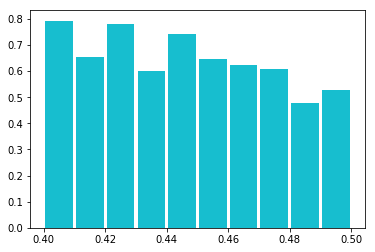

In [5]:
cbb.probability_hist(data, 20, 0.4, 0.6, 'accuracy')